In [0]:
!pip install tsfresh
!pip install tqdm

    100% |████████████████████████████████| 1.2MB 16.1MB/s 


In [0]:
# The essentials
import pandas as pd
import numpy as np

# Plotting
%matplotlib inline
import matplotlib.pyplot as plt

# Progress bars
from tqdm import tqdm_notebook


# TSFRESH Feature Extraction
#from tsfresh import extract_features
#from tsfresh.feature_extraction import EfficientFCParameters
#from tsfresh.utilities.dataframe_functions import impute

# Access our Google Drive
from google.colab import drive

In [0]:
drive.mount('/content/drive', force_remount=True)
!ls "/content/drive/My Drive/Rinse Over Run"

Mounted at /content/drive
all_train_preds_per_phase.p
baseline_features_with_preds_per_phase.csv
baseline_model_per_nunique_phases.csv
predictions_machine_405.csv
test_features_14.csv
test_features_15.csv
test_features_1.csv
test_features_2.csv
test_features_3.csv
test_features_6.csv
test_features_7.csv
test_features_8.csv
test_features_per_phase_14.csv
test_features_per_phase_15.csv
test_features_per_phase_1.csv
test_features_per_phase_2.csv
test_features_per_phase_3.csv
test_features_per_phase_6.csv
test_features_per_phase_7.csv
test_features_per_phase_8.csv
test_preds_per_phase.p
test_values.csv
train_features_14.csv
train_features_15.csv
train_features_1.csv
train_features_2.csv
train_features_3.csv
train_features_6.csv
train_features_7.csv
train_features_8.csv
train_features_adv_14.csv
train_features_adv_15.csv
train_features_adv_1.csv
train_features_adv_2.csv
train_features_adv_3.csv
train_features_adv_6.csv
train_features_adv_7.csv
train_features_adv_8.csv
train_features_per_pha

In [0]:
PROCESS_COMBINATION = 3

phases = {
    15: ['pre_rinse', 'caustic', 'intermediate_rinse', 'acid'],
    3:  ['pre_rinse', 'caustic'],
    7:  ['pre_rinse', 'caustic', 'intermediate_rinse'],
    1:  ['pre_rinse'],
    8:  ['acid'],
    2:  ['caustic'],
    6:  ['caustic', 'intermediate_rinse'],
    14: ['caustic', 'intermediate_rinse', 'acid'],
}

ts_cols = [
    'supply_flow',
    'supply_pressure',
    'return_temperature',
    'return_conductivity',
    'return_turbidity',
    'return_flow',
    'tank_level_pre_rinse',
    'tank_level_caustic',
    'tank_level_acid',
    'tank_level_clean_water',
    'tank_temperature_pre_rinse',
    'tank_temperature_caustic',
    'tank_temperature_acid',
    'tank_concentration_caustic',
    'tank_concentration_acid',
    'supply_pump',
    'supply_pre_rinse',
    'supply_caustic',
    'return_caustic',
    'supply_acid',
    'return_acid',
    'supply_clean_water',
    'return_recovery_water',
    'return_drain',
    'object_low_level'
]

In [0]:
extraction_settings = EfficientFCParameters()
filtered_settings = extraction_settings
filtered_functions = ['variance_larger_than_standard_deviation', 'has_duplicate_max', 
                      'has_duplicate_min', 'has_duplicate', 'sum_values', 'abs_energy', 
                      'mean_abs_change', 'mean_change', 'mean_second_derivative_central', 
                      'length', 'skewness', 'kurtosis', 'absolute_sum_of_changes', 
                      'longest_strike_below_mean', 'longest_strike_above_mean', 
                      'count_above_mean', 'count_below_mean', 'last_location_of_maximum', 
                      'first_location_of_maximum', 'last_location_of_minimum', 
                      'first_location_of_minimum', 
                      'percentage_of_reoccurring_datapoints_to_all_datapoints', 
                      'percentage_of_reoccurring_values_to_all_values', 
                      'sum_of_reoccurring_values', 'sum_of_reoccurring_data_points', 
                      'ratio_value_number_to_time_series_length', 
                      'cid_ce', 'symmetry_looking', 'large_standard_deviation', 'quantile', 
                      'autocorrelation', 'number_peaks', 'binned_entropy', 'index_mass_quantile', 
                      'linear_trend',  'number_crossing_m']
filtered_settings = {}
for function in filtered_functions:
    filtered_settings[function] = extraction_settings[function]

In [0]:
train_df = pd.read_csv('/content/drive/My Drive/Rinse Over Run/train_values.csv', index_col=0, parse_dates=['timestamp'])
train_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/train_features_{}.csv'.format(PROCESS_COMBINATION), index_col='process_id')
filtered_train_df = train_df[(train_df['process_id'].isin(train_features.index)) & 
                       (train_df['phase'].isin(phases[PROCESS_COMBINATION]))][['process_id', 'timestamp'] + ts_cols]

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [0]:
common_machines = set(train_df['object_id']).intersection(test_df['object_id'])
print(len(set(train_df['process_id'])))
#train_df[train_df['object_id'].isin(common_machines)].groupby('object_id')['process_id'].nunique().sort_values()
train_df[train_df['object_id'] == 405].groupby('process_id')['phase'].nunique()

5021


process_id
20001    5
20008    5
20011    5
20084    5
20133    5
20206    5
20223    5
20230    5
20248    5
20273    5
20292    5
20299    5
20304    5
20363    5
20391    5
20392    5
20432    5
20497    5
20535    5
20545    5
20549    5
20551    5
20561    5
20573    5
20609    5
20610    5
20614    5
20687    5
20696    5
20710    5
        ..
27541    5
27546    5
27574    5
27604    5
27635    5
27666    5
27688    5
27706    5
27707    5
27724    5
27726    5
27746    5
27750    5
27758    5
27769    5
27770    5
27778    5
27787    5
27797    5
27813    5
27823    5
27858    5
27897    5
27917    5
27919    5
27934    5
27943    5
27969    5
27974    5
27987    5
Name: phase, Length: 350, dtype: int64

In [0]:
test_df[test_df['object_id'].isin(common_machines)].groupby('object_id')['process_id'].nunique().sort_values()

object_id
436      1
434      1
424      1
435      1
103      4
938      4
964      8
954      8
953      9
952     10
109     11
951     11
919     11
438     11
437     12
427     13
950     13
108     13
111     13
426     14
409     14
966     14
110     14
107     15
957     15
965     19
918     19
214     19
215     19
429     19
      ... 
431     35
301     35
956     37
302     38
955     38
217     42
944     42
943     42
942     43
940     43
925     43
941     43
309     47
114     48
308     49
116     53
306     55
930     55
113     65
216     65
924     68
921     69
923     69
922     69
112     75
204     93
934    112
932    115
933    116
405    209
Name: process_id, Length: 88, dtype: int64

In [0]:
!pip install tslearn

    100% |████████████████████████████████| 593kB 21.5MB/s 
  Running setup.py bdist_wheel for tslearn ... - \ | / - \ | / - \ | / - \ done
  Stored in directory: /root/.cache/pip/wheels/7d/7f/21/f6752559d875e70042f67d229900c50887aa69de83ea719b32
Successfully built tslearn


In [0]:
def resample_fixed(df, n_new):
    n_old, m = df.values.shape
    mat_old = df.values
    mat_new = np.zeros((n_new, m))
    x_old = np.linspace(df.index.min(), df.index.max(), n_old)
    x_new = np.linspace(df.index.min(), df.index.max(), n_new)

    for j in range(m):
        y_old = mat_old[:, j]
        y_new = np.interp(x_new, x_old, y_old)
        mat_new[:, j] = y_new

    return pd.DataFrame(mat_new, index=x_new, columns=df.columns)

def get_time_series(data, processes, cols, mask=0, max_len=250, masking=False):
    all_ts_values = []
    
    for ix, process in enumerate(processes):
        filtered_data = data[data['process_id'] == process]
        filtered_data = filtered_data.sort_values(by='timestamp')
        filtered_data = filtered_data.reset_index(drop=True)
        filtered_data = filtered_data[cols].astype(float)
        for col in filtered_data.columns:
          if min(filtered_data[col]) < 0:
            filtered_data[col] += (abs(min(filtered_data[col])) + 1)
        if len(filtered_data) > max_len:
          filtered_data['ix'] = filtered_data.index // (len(filtered_data)/max_len)
          filtered_data = filtered_data.groupby('ix').mean()
          ts_values = filtered_data[ts_cols].values
        elif not masking and len(filtered_data) < max_len:
          ts_values = resample_fixed(filtered_data, max_len).values
          
        if masking:
            ts_values = filtered_data.values
            ts_values = np.vstack((ts_values, mask*np.ones((max_len - len(ts_values), ts_values.shape[1]))))
          
        all_ts_values.append(ts_values)

    return np.array(all_ts_values)
  
time_series = get_time_series(filtered_train_df, train_features.index, ts_cols)
print(time_series.shape)

(4743, 250, 25)


In [0]:
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans

In [0]:
X = to_time_series_dataset(time_series)
km = TimeSeriesKMeans(n_clusters=5, metric="softdtw")
labels = km.fit_predict(X)

KeyboardInterrupt: ignored

2


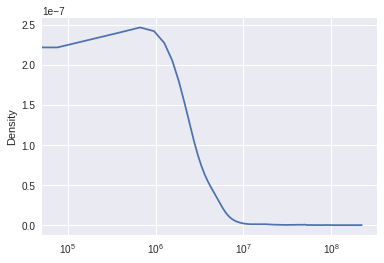

In [0]:
real_values_df =  pd.read_csv('/content/drive/My Drive/Rinse Over Run/train_labels.csv', index_col='process_id').loc[train_features.index]
real_values_df['cluster'] = labels

"""
x = real_values_df.sort_values(by='final_rinse_total_turbidity_liter')['final_rinse_total_turbidity_liter'].values

plt.scatter(x, [1]*len(x))
plt.xscale("log", nonposx='clip')
"""

real_values_df.sort_values(by='final_rinse_total_turbidity_liter')['final_rinse_total_turbidity_liter'].plot(kind='kde', logx=True)
print(sum(real_values_df['final_rinse_total_turbidity_liter'] > 10e7))
#real_values_df.groupby('cluster').describe()

In [0]:
test_df = pd.read_csv('/content/drive/My Drive/Rinse Over Run/test_values.csv', index_col=0, parse_dates=['timestamp'])
test_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/test_features_{}.csv'.format(PROCESS_COMBINATION), index_col='process_id')
filtered_test_df = test_df[(test_df['process_id'].isin(test_features.index)) & 
                       (test_df['phase'].isin(phases[PROCESS_COMBINATION]))][['process_id', 'timestamp'] + ts_cols]

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [0]:
filtered_df = pd.concat([filtered_train_df, filtered_test_df])
filtered_df[ts_cols] = filtered_df[ts_cols].astype(float)

In [0]:
for col in ts_cols:
    ts_features = extract_features(filtered_df[['process_id', 'timestamp'] + [col]], 
                                   column_id='process_id', column_sort="timestamp", 
                                   column_kind=None, column_value=None,
                                   impute_function=impute, 
                                   default_fc_parameters=filtered_settings,
                                   show_warnings=False)
    ts_features.to_csv('/content/drive/My Drive/Rinse Over Run/tsfresh_features_{}_{}.csv'.format(col, PROCESS_COMBINATION))


Feature Extraction:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

Process ForkPoolWorker-4:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/usr/local/lib/python3.6/dist-packages/tsfresh/utilities/distribution.py", line 38, in _function_with_partly_reduce
    results = list(itertools.chain.from_iterable(results))
  File "/usr/local/lib/python3.6/dist-packages/tsfresh/utilities/distribution.py", line 37, in <genexpr>
    results = (map_function(chunk, **kwargs) for chunk in chunk_list)
  File "/usr/local/lib/python3.6/dist-packages/tsfresh/feature_extraction/extraction.py", line 302, in _do_extraction_on_chunk
    return list(_f())
  File "/usr/local/lib/python3.6/dist-packages/tsfresh/feature_extraction/extraction.py", line 296, in _f

In [0]:

#ts_features.to_csv('/content/drive/My Drive/Rinse Over Run/tsfresh_features_{}.csv'.format(PROCESS_COMBINATION))

In [0]:
#useless_cols = list(ts_features.columns[ts_features.nunique() <= 1])
#useless_cols += list(ts_features.columns[ts_features.isnull().sum() / len(ts_features) > 0.5])
#print(useless_cols)

['object_low_level__has_duplicate', 'object_low_level__large_standard_deviation__r_0.5', 'object_low_level__large_standard_deviation__r_0.55', 'object_low_level__large_standard_deviation__r_0.6000000000000001', 'object_low_level__large_standard_deviation__r_0.65', 'object_low_level__large_standard_deviation__r_0.7000000000000001', 'object_low_level__large_standard_deviation__r_0.75', 'object_low_level__large_standard_deviation__r_0.8', 'object_low_level__large_standard_deviation__r_0.8500000000000001', 'object_low_level__large_standard_deviation__r_0.9', 'object_low_level__large_standard_deviation__r_0.9500000000000001', 'object_low_level__number_crossing_m__m_-1', 'object_low_level__number_crossing_m__m_1', 'object_low_level__symmetry_looking__r_0.0', 'object_low_level__variance_larger_than_standard_deviation']


In [0]:
#ts_features.drop(useless_cols, axis=1).to_csv('/content/drive/My Drive/Rinse Over Run/tsfresh_features_{}.csv'.format(PROCESS_COMBINATION))

In [0]:
!pip install catboost

    100% |████████████████████████████████| 55.5MB 795kB/s 
  [enum]
You must restart the runtime in order to use newly installed versions.


In [0]:
import glob
ts_features = None
for file in glob.glob('/content/drive/My Drive/Rinse Over Run/tsfresh_features*{}.csv'.format(PROCESS_COMBINATION)):
    df = pd.read_csv(file, index_col='id')
    if ts_features is None:
        ts_features = df
    else:
        ts_features = ts_features.merge(df, left_index=True, right_index=True)

In [0]:
useless_cols = list(ts_features.columns[ts_features.nunique() <= 1])
useless_cols += list(ts_features.columns[ts_features.isnull().sum() / len(ts_features) > 0.5])
print(len(useless_cols))
ts_features = ts_features.drop(useless_cols, axis=1)
ts_features.to_csv('/content/drive/My Drive/Rinse Over Run/tsfresh_features_{}.csv'.format(PROCESS_COMBINATION))

723


In [0]:
def custom_mape(approxes, targets):
    return np.mean(np.abs(np.subtract(approxes, targets)) / np.maximum(np.abs(targets), 290000))

class MAPEMetric(object):
    def get_final_error(self, error, weight):
        return error

    def is_max_optimal(self):
        return False

    def evaluate(self, approxes, targets, weight):
        return custom_mape(np.exp(approxes), np.exp(targets)), len(targets)

In [0]:
!pip install sklearn-contrib-py-earth

    100% |████████████████████████████████| 1.0MB 18.3MB/s 
  Running setup.py bdist_wheel for sklearn-contrib-py-earth ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
  Stored in directory: /root/.cache/pip/wheels/b7/8b/9c/4741513102ce3bd0f0227353dacdfbe9a5b0e47c261e45510b
Successfully built sklearn-contrib-py-earth


In [0]:
import os

from pyearth import Earth

mapes = {}
prediction_df = None
for process_comb, augment in zip([15, 3, 7, 1, 8, 2, 6, 14], [False, False, False, False, False, False, False, False]):
    test_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/test_features_{}.csv'.format(process_comb), index_col=['process_id'])
    train_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/train_features_adv_{}.csv'.format(process_comb), index_col=['process_id'])
    val_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/val_features_adv_{}.csv'.format(process_comb), index_col=['process_id'])
    
    if augment and os.path.exists('/content/drive/My Drive/Rinse Over Run/tsfresh_features_{}.csv'.format(process_comb)):
      ts_fresh_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/tsfresh_features_{}.csv'.format(process_comb), index_col=['id'])
      train_features = train_features.merge(ts_fresh_features, left_index=True, right_index=True)
      val_features = val_features.merge(ts_fresh_features, left_index=True, right_index=True)
      test_features = test_features.merge(ts_fresh_features, left_index=True, right_index=True)
    
    phases = {
        15: ['pre_rinse', 'caustic', 'intermediate_rinse', 'acid'],
        3:  ['pre_rinse', 'caustic'],
        7:  ['pre_rinse', 'caustic', 'intermediate_rinse'],
        1:  ['pre_rinse'],
        8:  ['acid'],
        2:  ['caustic'],
        6:  ['caustic', 'intermediate_rinse'],
        14: ['caustic', 'intermediate_rinse', 'acid'],
    }[process_comb]
    
    n_features = {
        15: 125,
        7:  165,
        14: 165,
        6:  250,
        3:  250,
        1:  500,
        8:  750,
        2:  500,
    }
    
    print(set(train_features.columns) - set(test_features.columns))
    for col in set(train_features.columns) - set(test_features.columns):
        train_features = train_features.drop(col, axis=1)
        
    for col in train_features.columns:
        if 'process_id' in col:
            train_features = train_features.drop(col, axis=1)
        
    test_features = test_features[train_features.columns]
    val_features = val_features[train_features.columns]
            
    X_train = train_features
    X_val = val_features
    X_test = test_features
    
    all_labels = pd.read_csv('/content/drive/My Drive/Rinse Over Run/train_labels.csv', index_col=['process_id'])
    
    y_train = np.log(all_labels.loc[X_train.index])
    y_val = np.log(all_labels.loc[X_val.index])
    
    # TODO: Hyper-parameter tuning, based on validation set!
    model = Earth(allow_missing=True)
    model.fit(X_train, y_train)
    
    val_predictions = np.exp(model.predict(X_val))
    predictions = np.exp(model.predict(X_test))
    
    model_mape = custom_mape(val_predictions, np.exp(y_val.values).flatten())
    print(process_comb, model_mape)
    mapes[process_comb] = model_mape

    sub_predictions_df = pd.DataFrame(predictions, columns=['final_rinse_total_turbidity_liter'])
    sub_predictions_df.index = X_test.index
    sub_predictions_df.index.name = X_test.index.name
    
    if prediction_df is None:
        prediction_df = sub_predictions_df
    else:
        prediction_df = pd.concat([prediction_df, sub_predictions_df])

ModuleNotFoundError: ignored

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from pyearth import Earth
import scipy.stats

process_comb=15

test_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/test_features_{}.csv'.format(process_comb), index_col=['process_id'])
train_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/train_features_adv_{}.csv'.format(process_comb), index_col=['process_id'])
val_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/val_features_adv_{}.csv'.format(process_comb), index_col=['process_id'])
all_labels = pd.read_csv('/content/drive/My Drive/Rinse Over Run/train_labels.csv', index_col=['process_id'])

ts_fresh_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/tsfresh_features_{}.csv'.format(process_comb), index_col=['id'])
train_features = train_features.merge(ts_fresh_features, left_index=True, right_index=True)
val_features = val_features.merge(ts_fresh_features, left_index=True, right_index=True)
test_features = test_features.merge(ts_fresh_features, left_index=True, right_index=True)

for col in set(train_features.columns) - set(test_features.columns):
    train_features = train_features.drop(col, axis=1)

for col in train_features.columns:
    if 'process_id' in col:
        train_features = train_features.drop(col, axis=1)

test_features = test_features[train_features.columns]
val_features = val_features[train_features.columns]

# Use scipy.stats.randint and ... for floats

hyper_params = {
    'max_terms': scipy.stats.randint(100, 500),
    'max_degree': scipy.stats.randint(1, 3),
    'penalty': scipy.stats.uniform(0, 5),
    'endspan_alpha': scipy.stats.uniform(0, 0.5),
    'minspan_alpha': scipy.stats.uniform(0, 0.5)
}

for _ in range(10):
  config = {}
  for k in hyper_params:
    config[k] = hyper_params[k].rvs(1)[0]
  config['allow_missing'] = True
  
  print(config)
  
  X_train = train_features
  X_val = val_features
  X_test = test_features
  
  y_train = np.log(all_labels.loc[X_train.index])
  y_val = np.log(all_labels.loc[X_val.index])
  
  earth = Earth(**config)
  earth.fit(X_train, y_train)
  
  val_predictions = np.exp(earth.predict(X_val))
  
  model_mape = custom_mape(val_predictions, np.exp(y_val.values).flatten())
  print(model_mape)
  
# [process_comb = 15] MAPE=0.3817 {'max_terms': 123, 'max_degree': 1, 'penalty': 1.4500411201233443, 'endspan_alpha': 0.10200383085543158, 'minspan_alpha': 0.4198224901292112, 'allow_missing': True}

{'max_terms': 163, 'max_degree': 1, 'penalty': 2.09079965220955, 'endspan_alpha': 0.08063158738930809, 'minspan_alpha': 0.09088885321622342, 'allow_missing': True}


/usr/local/lib/python3.6/dist-packages/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.6/dist-packages/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


0.4288282362385061
{'max_terms': 123, 'max_degree': 1, 'penalty': 1.4500411201233443, 'endspan_alpha': 0.10200383085543158, 'minspan_alpha': 0.4198224901292112, 'allow_missing': True}


/usr/local/lib/python3.6/dist-packages/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.6/dist-packages/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


0.38169864233394196
{'max_terms': 147, 'max_degree': 1, 'penalty': 4.995302954601059, 'endspan_alpha': 0.21910338072146124, 'minspan_alpha': 0.05098489429131792, 'allow_missing': True}


/usr/local/lib/python3.6/dist-packages/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.6/dist-packages/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


0.41232345371848367
{'max_terms': 175, 'max_degree': 2, 'penalty': 2.2746099591422193, 'endspan_alpha': 0.2504008545420891, 'minspan_alpha': 0.13241324965050966, 'allow_missing': True}


KeyboardInterrupt: ignored

In [0]:
!pip install keras

In [0]:
import keras.backend as K
from keras import models, layers, optimizers
def custom_mape_exp(y_true,y_pred):
    y_true = K.exp(y_true)
    y_pred = K.exp(y_pred)
  
    return K.mean(K.abs(y_pred - y_true) / K.maximum(K.abs(y_true), 290000))
  
def custom_smape_exp(y_true,y_pred):
    y_true = K.exp(y_true)
    y_pred = K.exp(y_pred)
  
    return K.mean(K.abs(y_pred - y_true) / (y_pred + y_true))
  
def custom_mape(y_true,y_pred):
    return K.mean(K.abs(y_pred - y_true) / K.maximum(K.abs(y_true), np.log(290000)))
  
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', name='dense1', input_shape=(2185,)))
model.add(layers.Dense(64, activation='relu', name='dense2'))
model.add(layers.Dense(1, name='output'))

model.compile(optimizers.adam(), loss=custom_mape_exp)

model.fit(X_train, y_train, batch_size=64, epochs=1000, validation_data=(X_val, y_val))

Train on 3354 samples, validate on 372 samples
Epoch 1/1000
3354/3354 [==============================] - 1s 397us/step - loss: 0.8489 - val_loss: 0.8194
Epoch 2/1000
3354/3354 [==============================] - 1s 240us/step - loss: 0.8578 - val_loss: 0.8193
Epoch 3/1000
3354/3354 [==============================] - 1s 195us/step - loss: 0.8490 - val_loss: 0.8248
Epoch 4/1000
3354/3354 [==============================] - 1s 196us/step - loss: 12.1288 - val_loss: 0.8195
Epoch 5/1000
3354/3354 [==============================] - 1s 198us/step - loss: 0.8490 - val_loss: 0.8195
Epoch 6/1000
3354/3354 [==============================] - 1s 200us/step - loss: 0.8489 - val_loss: 0.8194
Epoch 7/1000
3354/3354 [==============================] - 1s 202us/step - loss: 0.8496 - val_loss: 0.8195
Epoch 8/1000
3354/3354 [==============================] - 1s 199us/step - loss: 0.8490 - val_loss: 0.8195
Epoch 9/1000
3354/3354 [==============================] - 1s 204us/step - loss: 0.8491 - val_loss: 0.819

KeyboardInterrupt: ignored

In [0]:
from catboost import CatBoostRegressor
import os

mapes = {}
prediction_df = None
for process_comb, augment in zip([15, 3, 7, 1, 8, 2, 6, 14], [False, False, False, False, False, False, False, False]):
    test_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/test_features_per_phase_{}.csv'.format(process_comb), index_col=['process_id'])
    train_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/train_features_per_phase_{}.csv'.format(process_comb), index_col=['process_id'])
    train_features_idx = pd.read_csv('/content/drive/My Drive/Rinse Over Run/train_features_adv_{}.csv'.format(process_comb), index_col=['process_id']).index
    val_features_idx = pd.read_csv('/content/drive/My Drive/Rinse Over Run/val_features_adv_{}.csv'.format(process_comb), index_col=['process_id']).index
    
    val_features = train_features.loc[val_features_idx]
    train_features = train_features.loc[train_features_idx]
    
    if augment and os.path.exists('/content/drive/My Drive/Rinse Over Run/tsfresh_features_{}.csv'.format(process_comb)):
      ts_fresh_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/tsfresh_features_{}.csv'.format(process_comb), index_col=['id'])
      train_features = train_features.merge(ts_fresh_features, left_index=True, right_index=True)
      val_features = val_features.merge(ts_fresh_features, left_index=True, right_index=True)
      test_features = test_features.merge(ts_fresh_features, left_index=True, right_index=True)
    
    #train_features = train_features.sample(50)
    #val_features = val_features.sample(50)
    #test_features = test_features.sample(50)
    
    phases = {
        15: ['pre_rinse', 'caustic', 'intermediate_rinse', 'acid'],
        3:  ['pre_rinse', 'caustic'],
        7:  ['pre_rinse', 'caustic', 'intermediate_rinse'],
        1:  ['pre_rinse'],
        8:  ['acid'],
        2:  ['caustic'],
        6:  ['caustic', 'intermediate_rinse'],
        14: ['caustic', 'intermediate_rinse', 'acid'],
    }[process_comb]
    
    n_features = {
        15: 125,
        7:  165,
        14: 165,
        6:  250,
        3:  250,
        1:  500,
        8:  750,
        2:  500,
    }
    
    #tsfresh_relevant_features = pickle.load(open('data/relevant_features_sorted_{}.p'.format(process_comb), 'rb'))
    #tsfresh_relevant_features = tsfresh_relevant_features[:n_features[process_comb]]
    #if 'id' in tsfresh_relevant_features:
    #    tsfresh_relevant_features.remove('id')
    
    #train_features = get_ts_fresh_features(train_features, phases, tsfresh_relevant_features, file_prefix='train')
    #test_features = get_ts_fresh_features(test_features, phases, tsfresh_relevant_features, file_prefix='test')
    #val_features = get_ts_fresh_features(val_features, phases, tsfresh_relevant_features, file_prefix='train')
    
    print(set(train_features.columns) - set(test_features.columns))
    for col in set(train_features.columns) - set(test_features.columns):
        train_features = train_features.drop(col, axis=1)
        
    for col in train_features.columns:
        if 'process_id' in col:
            train_features = train_features.drop(col, axis=1)
        
    test_features = test_features[train_features.columns]
    val_features = val_features[train_features.columns]
    
    print(list(train_features.columns))
            
    X_train = train_features
    X_val = val_features
    X_test = test_features
    
    all_labels = pd.read_csv('/content/drive/My Drive/Rinse Over Run/train_labels.csv', index_col=['process_id'])

    """
    train_idx = np.random.choice(train_features.index, replace=False, size=int(0.9 * len(train_features)))
    val_idx = list(set(train_features.index) - set(train_idx))
        
    X_train = train_features.loc[train_idx, :]
    X_val = train_features.loc[val_idx, :]
    y_train = np.log(train_labels.loc[train_idx])
    y_val = np.log(train_labels.loc[val_idx])
    X_test = test_features
    """
    
    print(X_train.shape, X_val.shape, X_test.shape)
    
    y_train = np.log(all_labels.loc[X_train.index])
    y_val = np.log(all_labels.loc[X_val.index])
    
    cat = CatBoostRegressor(iterations=100000, od_type='Iter', od_wait=100, learning_rate=0.33,
                        loss_function='MAPE', eval_metric=MAPEMetric())
    cat.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=50)
    
    val_predictions = np.exp(cat.predict(X_val))
    predictions = np.exp(cat.predict(X_test))
    
    model_mape = custom_mape(val_predictions, np.exp(y_val.values).flatten())
    print(process_comb, model_mape)
    mapes[process_comb] = model_mape

    sub_predictions_df = pd.DataFrame(predictions, columns=['final_rinse_total_turbidity_liter'])
    sub_predictions_df.index = X_test.index
    sub_predictions_df.index.name = X_test.index.name
    
    if prediction_df is None:
        prediction_df = sub_predictions_df
    else:
        prediction_df = pd.concat([prediction_df, sub_predictions_df])

{'pipeline_L12'}
['pipeline_L1', 'pipeline_L10', 'pipeline_L11', 'pipeline_L2', 'pipeline_L3', 'pipeline_L4', 'pipeline_L6', 'pipeline_L7', 'pipeline_L8', 'pipeline_L9', 'num_phases', "('supply_flow', 'min')", "('supply_flow', 'max')", "('supply_flow', 'mean')", "('supply_flow', 'std')", "('supply_flow', 'count')", "('supply_pressure', 'min')", "('supply_pressure', 'max')", "('supply_pressure', 'mean')", "('supply_pressure', 'std')", "('supply_pressure', 'count')", "('return_temperature', 'min')", "('return_temperature', 'max')", "('return_temperature', 'mean')", "('return_temperature', 'std')", "('return_temperature', 'count')", "('return_conductivity', 'min')", "('return_conductivity', 'max')", "('return_conductivity', 'mean')", "('return_conductivity', 'std')", "('return_conductivity', 'count')", "('return_turbidity', 'min')", "('return_turbidity', 'max')", "('return_turbidity', 'mean')", "('return_turbidity', 'std')", "('return_turbidity', 'count')", "('return_flow', 'min')", "('re

Got unsafe target value = 2.83273e+06 at object #2 of dataset learn
Got unsafe target value = 7.04829e+06 at object #1 of dataset test #0


0:	learn: 0.8490322	test: 0.8194794	best: 0.8194794 (0)	total: 612ms	remaining: 16h 59m 53s
50:	learn: 0.8489986	test: 0.8194443	best: 0.8194443 (50)	total: 12.6s	remaining: 6h 51m 3s
100:	learn: 0.8489647	test: 0.8194089	best: 0.8194089 (100)	total: 15.5s	remaining: 4h 16m 6s
150:	learn: 0.8489308	test: 0.8193736	best: 0.8193736 (150)	total: 18.5s	remaining: 3h 23m 54s
200:	learn: 0.8488969	test: 0.8193382	best: 0.8193382 (200)	total: 21.4s	remaining: 2h 57m 26s
250:	learn: 0.8488630	test: 0.8193029	best: 0.8193029 (250)	total: 24.4s	remaining: 2h 41m 46s
300:	learn: 0.8488291	test: 0.8192675	best: 0.8192675 (300)	total: 27.4s	remaining: 2h 31m 5s
350:	learn: 0.8487952	test: 0.8192321	best: 0.8192321 (350)	total: 30.3s	remaining: 2h 23m 26s
400:	learn: 0.8487613	test: 0.8191968	best: 0.8191968 (400)	total: 33.3s	remaining: 2h 17m 40s
450:	learn: 0.8487274	test: 0.8191614	best: 0.8191614 (450)	total: 36.2s	remaining: 2h 13m 11s
500:	learn: 0.8486935	test: 0.8191260	best: 0.8191260 (500

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-092f1de46d16>", line 93, in <module>
    cat.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=50)
  File "/usr/local/lib/python3.6/dist-packages/catboost/core.py", line 2549, in fit
    save_snapshot, snapshot_file, snapshot_interval)
  File "/usr/local/lib/python3.6/dist-packages/catboost/core.py", line 1126, in _fit
    self._train(train_pool, eval_sets, params, allow_clear_pool)
  File "/usr/local/lib/python3.6/dist-packages/catboost/core.py", line 828, in _train
    self._object._train(train_pool, test_pool, params, allow_clear_pool)
  File "_catboost.pyx", line 2296, in _catboost._CatBoost._train
  File "_catboost.pyx", line 2316, in _catboost._CatBoost._train
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (m

KeyboardInterrupt: ignored

In [0]:
weights = {3: 0.39838220424671383, 15: 0.22615436467812605, 7: 0.22581732389619144, 
           1: 0.09841590832490732, 8: 0.04111897539602292, 2: 0.007751937984496124, 
           14: 0.0016852039096730705, 6: 0.0006740815638692282}
#print(mapes)
total_mape = 0
for k in mapes:
    total_mape += weights[k]*mapes[k]
print('Expected LB MAPE = {}'.format(total_mape))

Expected LB MAPE = 0.3071536419662661


In [0]:
prediction_df = prediction_df.sort_index()
prediction_df.index.name = X_test.index.name
prediction_df.to_csv('/content/drive/My Drive/Rinse Over Run/tsfresh_mix_per_phase_combination_adv.csv')

In [0]:
"""
Current best submission (no adversarial validation!):
{15: 0.25426981635083756, 3: 0.3052211285365693, 7: 0.29966068132620977, 
 1: 0.30628787849841654, 8: 0.26943375049818474, 2: 0.3010758041450963, 
 6: 0.2634186096320583, 14: 0.24526820997876214}
Expected LB MAPE = 0.29091472094270604


all tsfresh features for all 8 models (adversarial validation):
{15: 0.25369314638650514, 3: 0.3485206977395646, 7: 0.27274180323993563, 
 1: 0.3258186511871589, 8: 0.49481063651450297, 2: 0.3888194424409063, 
 6: 0.28262367909221875, 14: 0.28390152064193996}
Expected LB MAPE = 0.31390297272100504

no tsfresh features for all 8 models (adversarial validation):
{15: 0.27324461663572763, 3: 0.34910710056749367, 7: 0.28110561192733285, 
 1: 0.32522312865531333, 8: 0.5092735866826277, 2: 0.37858519974291055, 
 6: 0.2847898303458595, 14: 0.29353142555367306}
Expected LB MAPE = 0.32092137450281183


mix of tsfresh additions, added features extracted per phase:
{15: 0.24972805296383455, 3: 0.33178520753377977, 7: 0.2724305759333337, 1: 0.32365269469066726, 8: 0.4977804726738607, 2: 0.3846152555839593, 6: 0.29249228927919824, 14: 0.29159051201280783}
Expected LB MAPE = 0.3061648187569712
"""

'\nCurrent best submission (no adversarial validation!):\n{15: 0.25426981635083756, 3: 0.3052211285365693, 7: 0.29966068132620977, \n 1: 0.30628787849841654, 8: 0.26943375049818474, 2: 0.3010758041450963, \n 6: 0.2634186096320583, 14: 0.24526820997876214}\nExpected LB MAPE = 0.29091472094270604\n\n\nall tsfresh features for all 8 models (adversarial validation):\n{15: 0.25369314638650514, 3: 0.3485206977395646, 7: 0.27274180323993563, \n 1: 0.3258186511871589, 8: 0.49481063651450297, 2: 0.3888194424409063, \n 6: 0.28262367909221875, 14: 0.28390152064193996}\nExpected LB MAPE = 0.31390297272100504\n\nno tsfresh features for all 8 models (adversarial validation):\n\n'

In [0]:
import os
from catboost import CatBoostRegressor

mapes = {}
prediction_df = None
for process_combs in [[15], [7, 14], [1, 2, 8], [6, 3]]:
  train_dfs = []
  test_dfs = []
  val_dfs = []
  for process_comb in process_combs:
      test_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/test_features_{}.csv'.format(process_comb), index_col=['process_id'])
      val_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/val_features_adv_{}.csv'.format(process_comb), index_col=['process_id'])
      train_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/train_features_adv_{}.csv'.format(process_comb), index_col=['process_id'])
      
      if process_comb == 15:
        ts_fresh_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/tsfresh_features_{}.csv'.format(process_comb), index_col=['id'])
        train_features = train_features.merge(ts_fresh_features, left_index=True, right_index=True)
        val_features = val_features.merge(ts_fresh_features, left_index=True, right_index=True)
        test_features = test_features.merge(ts_fresh_features, left_index=True, right_index=True)

      test_features['process_comb'] = process_comb
      train_features['process_comb'] = process_comb
      val_features['process_comb'] = process_comb

      train_dfs.append(train_features)
      test_dfs.append(test_features)
      val_dfs.append(val_features)

  all_train_features = pd.concat(train_dfs)
  all_test_features = pd.concat(test_dfs)
  all_val_features = pd.concat(val_dfs)

  for col in set(all_train_features.columns) - set(all_test_features.columns):
      all_train_features = all_train_features.drop(col, axis=1)

  for col in set(all_train_features.columns) - set(all_val_features.columns):
      all_train_features = all_train_features.drop(col, axis=1)

  for col in all_train_features.columns:
      if 'process_id' in col:
          all_train_features = all_train_features.drop(col, axis=1)

  all_test_features = all_test_features[all_train_features.columns]
  all_val_features = all_val_features[all_train_features.columns]


  all_train_features = pd.get_dummies(all_train_features, columns=['process_comb'])
  all_val_features = pd.get_dummies(all_val_features, columns=['process_comb'])
  all_test_features = pd.get_dummies(all_test_features, columns=['process_comb'])

  print(all_train_features.shape, all_test_features.shape, all_val_features.shape)
  

  X_train = all_train_features
  X_val = all_val_features
  X_test = all_test_features

  all_labels = pd.read_csv('/content/drive/My Drive/Rinse Over Run/train_labels.csv', index_col=['process_id'])

  print(X_train.shape, X_val.shape, X_test.shape)

  y_train = np.log(all_labels.loc[X_train.index])
  y_val = np.log(all_labels.loc[X_val.index])

  cat = CatBoostRegressor(iterations=100000, od_type='Iter', od_wait=100, learning_rate=0.33,
                      loss_function='MAPE', eval_metric=MAPEMetric())
  cat.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=50)
  
  for process_comb in process_combs:
    X_val_sub = X_val[X_val['process_comb_{}'.format(process_comb)] == 1]
    y_val_sub = y_val[X_val['process_comb_{}'.format(process_comb)] == 1]
    val_predictions = np.exp(cat.predict(X_val_sub))

    model_mape = custom_mape(val_predictions, np.exp(y_val_sub.values).flatten())
    print(process_comb, model_mape)
    mapes[process_comb] = model_mape
    
    X_test_sub = X_test[X_test['process_comb_{}'.format(process_comb)] == 1]
    
    predictions = np.exp(cat.predict(X_test_sub))
    
    sub_predictions_df = pd.DataFrame(predictions, columns=['final_rinse_total_turbidity_liter'])
    sub_predictions_df.index = X_test_sub.index
    sub_predictions_df.index.name = X_test_sub.index.name
    
    if prediction_df is None:
        prediction_df = sub_predictions_df
    else:
        prediction_df = pd.concat([prediction_df, sub_predictions_df])
        
        
    #TODO: Give weights to samples, according to what model they stem from. E.g. more weight to comb 7 than comb 14 since it occurs more in test set!

(3354, 2186) (671, 2186) (372, 2186)
(3354, 2186) (372, 2186) (671, 2186)
0:	learn: 0.8490310	test: 0.8194781	best: 0.8194781 (0)	total: 3.56s	remaining: 4d 2h 49m 5s
50:	learn: 0.8490263	test: 0.8194732	best: 0.8194732 (50)	total: 1m 55s	remaining: 2d 14h 51m 10s
100:	learn: 0.8490086	test: 0.8194540	best: 0.8194540 (100)	total: 2m 42s	remaining: 1d 20h 36m 21s
150:	learn: 0.8489419	test: 0.8193803	best: 0.8193803 (150)	total: 3m 21s	remaining: 1d 12h 55m 41s
200:	learn: 0.8486882	test: 0.8190944	best: 0.8190944 (200)	total: 4m 2s	remaining: 1d 9h 30m 18s
250:	learn: 0.8477140	test: 0.8179730	best: 0.8179730 (250)	total: 4m 43s	remaining: 1d 7h 15m 3s
300:	learn: 0.8439321	test: 0.8135358	best: 0.8135358 (300)	total: 5m 24s	remaining: 1d 5h 49m 12s
350:	learn: 0.8295841	test: 0.7970042	best: 0.7970042 (350)	total: 6m 27s	remaining: 1d 6h 32m 5s
400:	learn: 0.7933857	test: 0.7578176	best: 0.7578176 (400)	total: 8m 27s	remaining: 1d 11h 36s
450:	learn: 0.7358974	test: 0.7037779	best: 0.

In [0]:
weights = {3: 0.39838220424671383, 15: 0.22615436467812605, 7: 0.22581732389619144, 
           1: 0.09841590832490732, 8: 0.04111897539602292, 2: 0.007751937984496124, 
           14: 0.0016852039096730705, 6: 0.0006740815638692282}
print(mapes)
total_mape = 0
for k in mapes:
    total_mape += weights[k]*mapes[k]
print('Expected LB MAPE = {}'.format(total_mape))

{15: 0.25369314638650514, 7: 0.23622146277156494, 14: 0.2933354819738391, 1: 0.3417815185855564, 2: 0.41728887344733256, 8: 0.5698073475303632, 6: 0.2887632665162997, 3: 0.32172904097493116}
Expected LB MAPE = 0.2998782458956991


In [0]:
prediction_df = prediction_df.sort_index()
prediction_df.index.name = X_test.index.name
prediction_df.to_csv('/content/drive/My Drive/Rinse Over Run/baseline_model_per_nunique_phases.csv')

In [0]:
"""
3 0.33336140587776186
6 0.306495037284206
"""

'\n3 0.33336140587776186\n6 0.306495037284206\n'

In [0]:
!pip install MulticoreTSNE

In [0]:
import os
from sklearn.manifold import TSNE

for process_comb in [15]:
    test_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/test_features_{}.csv'.format(process_comb), index_col=['process_id'])
    val_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/val_features_adv_{}.csv'.format(process_comb), index_col=['process_id'])
    train_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/train_features_adv_{}.csv'.format(process_comb), index_col=['process_id'])

    all_labels = pd.read_csv('/content/drive/My Drive/Rinse Over Run/train_labels.csv', index_col=['process_id'])
    labels = pd.concat([all_labels.loc[train_features.index], all_labels.loc[val_features.index]])

    embeddings = TSNE().fit_transform(pd.concat([train_features, val_features]))

NameError: ignored

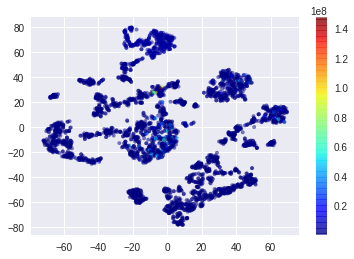

In [0]:
vis_x = embeddings[:, 0]
vis_y = embeddings[:, 1]
plt.scatter(vis_x, vis_y, c=list(labels['final_rinse_total_turbidity_liter'].values), cmap=plt.cm.get_cmap("jet"), marker='.', alpha=0.5)
plt.colorbar()
plt.show()

In [0]:
labels.values

array([[ 753343.7885176 ],
       [1307220.33004387],
       [4122201.44036384],
       ...,
       [ 517239.57289463],
       [ 964098.14705683],
       [1865854.27830761]])

In [0]:
train_processes_405 = set(train_df[train_df['object_id'] == 405]['process_id'])
test_processes_405 = set(test_df[test_df['object_id'] == 405]['process_id'])

In [0]:
process_comb=15
test_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/test_features_{}.csv'.format(process_comb), index_col=['process_id'])
train_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/train_features_adv_{}.csv'.format(process_comb), index_col=['process_id'])
val_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/val_features_adv_{}.csv'.format(process_comb), index_col=['process_id'])


for col in set(train_features.columns) - set(test_features.columns):
    train_features = train_features.drop(col, axis=1)

for col in set(train_features.columns) - set(val_features.columns):
    train_features = train_features.drop(col, axis=1)

test_features = test_features[train_features.columns]
val_features = val_features[train_features.columns]
#train_features = pd.concat([train_features, val_features])

train_features_405 = train_features.loc[train_processes_405, :]
val_features_405 = val_features.loc[train_processes_405, :]
all_labels = pd.read_csv('/content/drive/My Drive/Rinse Over Run/train_labels.csv', index_col=['process_id'])
labels_405 = all_labels.loc[processes_405]

#train_idx = np.random.choice(train_features_405.index, replace=False, size=int(0.9 * len(train_features_405)))
#val_idx = list(set(train_features_405.index) - set(train_idx))

X_train = train_features_405#.loc[train_idx, :]
X_val = val_features_405#.loc[val_idx, :]
y_train = labels_405.loc[train_features_405.index]
y_val = labels_405.loc[val_features_405.index]
X_test = test_features.loc[test_processes_405, :]

# train_mean = np.mean(y_train.values)
# train_std = np.std(y_train.values)

# y_train = (y_train - train_mean) / train_std
# y_val = (y_val - train_mean) / train_std

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.ht

In [0]:
from catboost import CatBoostRegressor
class MAPEMetric(object):
    def get_final_error(self, error, weight):
        return error

    def is_max_optimal(self):
        return False

    def evaluate(self, approxes, targets, weight):
        return custom_mape(approxes, targets), len(targets)
cat = CatBoostRegressor(iterations=100000, od_type='Iter', od_wait=100, learning_rate=0.1, l2_leaf_reg=5,
                    loss_function='MAPE', eval_metric=MAPEMetric())
cat.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=50)

Got unsafe target value = 1.16036e+06 at object #0 of dataset learn
Got unsafe target value = 1.68831e+06 at object #3 of dataset test #0


0:	learn: 0.7891742	test: 0.8258893	best: 0.8258893 (0)	total: 61.1ms	remaining: 1h 41m 45s


KeyboardInterrupt: ignored

In [0]:
predictions = np.exp(cat.predict(X_test))
    
sub_predictions_df = pd.DataFrame(predictions, columns=['final_rinse_total_turbidity_liter'])
sub_predictions_df.index = X_test.index
sub_predictions_df.index.name = X_test.index.name

sub_predictions_df.to_csv('/content/drive/My Drive/Rinse Over Run/predictions_machine_405.csv')

In [0]:
all_labels.loc[set(train_df[train_df['object_id'] == 933]['process_id'])].describe()

,final_rinse_total_turbidity_liter
count,1.820000e+02
mean,3.109110e+06
std,8.603257e+06
min,1.811589e+04
25%,6.100857e+05
50%,6.898592e+05
75%,1.801106e+06
max,5.653076e+07


In [0]:
all_labels.loc[set(train_df[train_df['object_id'] == 934]['process_id'])].describe()

,final_rinse_total_turbidity_liter
count,1.790000e+02
mean,2.846250e+06
std,7.806123e+06
min,2.881740e+05
25%,4.502618e+05
50%,5.068292e+05
75%,1.143741e+06
max,5.140962e+07


In [0]:
all_labels.loc[set(train_df[train_df['object_id'] == 932]['process_id'])].describe()

,final_rinse_total_turbidity_liter
count,1.850000e+02
mean,2.274203e+06
std,6.186817e+06
min,7.672421e+04
25%,6.001127e+05
50%,6.683525e+05
75%,1.170179e+06
max,4.875421e+07


In [0]:
y_train

,final_rinse_total_turbidity_liter
process_id,
26624,-0.455487
24588,-0.253283
20497,-1.144773
24593,-0.192619
26641,-0.871394
22549,-0.623104
24613,-0.792099
24628,0.055880
24630,-0.197682


In [0]:
PROCESS_COMBINATION=15
train_df = pd.read_csv('/content/drive/My Drive/Rinse Over Run/train_values.csv', index_col=0, parse_dates=['timestamp'])
train_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/train_features_{}.csv'.format(PROCESS_COMBINATION), index_col='process_id')
filtered_train_df = train_df[(train_df['process_id'].isin(train_features.index))]
final_phase_filtered_train_df = filtered_train_df[(filtered_train_df['phase'] == 'final_rinse') & (filtered_train_df['target_time_period'])]

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [0]:
all_labels = pd.read_csv('/content/drive/My Drive/Rinse Over Run/train_labels.csv', index_col=['process_id'])

y_first_part = all_labels.loc[train_features.index].copy()
y_second_part = all_labels.loc[train_features.index].copy()
y_third_part = all_labels.loc[train_features.index].copy()
for process in train_features.index:
  process_data = final_phase_filtered_train_df[final_phase_filtered_train_df['process_id'] == process]
  
  process_data = process_data.sort_values(by='timestamp')
  process_data['index'] = list(range(len(process_data)))
  process_data['group_index'] = process_data['index'] // (len(process_data) / 2)
  
  process_data['return_flow'] = process_data['return_flow'].apply(lambda x: max(0, x))
  
  process_data['label'] = process_data['return_turbidity'] * process_data['return_flow'] * process_data['target_time_period']
  
  y_vals = process_data.groupby('group_index')['label'].sum().values
  
  y_first_part.loc[process, 'final_rinse_total_turbidity_liter'] = max(0, y_vals[0])
  y_second_part.loc[process, 'final_rinse_total_turbidity_liter'] = max(0, y_vals[1])

In [0]:
test_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/test_features_{}.csv'.format(PROCESS_COMBINATION), index_col=['process_id'])
train_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/train_features_adv_{}.csv'.format(PROCESS_COMBINATION), index_col=['process_id'])
val_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/val_features_adv_{}.csv'.format(PROCESS_COMBINATION), index_col=['process_id'])


for col in set(train_features.columns) - set(test_features.columns):
    train_features = train_features.drop(col, axis=1)

for col in set(train_features.columns) - set(val_features.columns):
    train_features = train_features.drop(col, axis=1)

test_features = test_features[train_features.columns]
val_features = val_features[train_features.columns]

X_train = train_features
X_test = test_features
X_val = val_features

y_train = np.log(y_first_part.loc[train_features.index] + 1)
y_val = np.log(y_first_part.loc[val_features.index] + 1)

cat_first_part = CatBoostRegressor(iterations=100000, od_type='Iter', od_wait=100, learning_rate=0.33,
                                   loss_function='MAPE', eval_metric=MAPEMetric())
cat_first_part.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=50)

0:	learn: 0.8128101	test: 0.7775681	best: 0.7775681 (0)	total: 258ms	remaining: 7h 10m 1s
50:	learn: 0.8128044	test: 0.7775623	best: 0.7775623 (50)	total: 11.3s	remaining: 6h 9m 26s
100:	learn: 0.8127827	test: 0.7775396	best: 0.7775396 (100)	total: 16.4s	remaining: 4h 30m 51s
150:	learn: 0.8126990	test: 0.7774497	best: 0.7774497 (150)	total: 21.5s	remaining: 3h 57m 4s
200:	learn: 0.8123726	test: 0.7770915	best: 0.7770915 (200)	total: 26.2s	remaining: 3h 37m 1s
250:	learn: 0.8110842	test: 0.7756453	best: 0.7756453 (250)	total: 31.9s	remaining: 3h 31m 14s
300:	learn: 0.8059599	test: 0.7697684	best: 0.7697684 (300)	total: 37.4s	remaining: 3h 26m 17s
350:	learn: 0.7896779	test: 0.7526725	best: 0.7526725 (350)	total: 48.2s	remaining: 3h 47m 54s
400:	learn: 0.7495648	test: 0.7120073	best: 0.7120073 (400)	total: 1m 1s	remaining: 4h 13m
450:	learn: 0.6708380	test: 0.6443605	best: 0.6443605 (450)	total: 1m 14s	remaining: 4h 32m 53s
500:	learn: 0.4939717	test: 0.5179922	best: 0.5179922 (500)	tot

In [0]:
process_comb=15
test_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/test_features_{}.csv'.format(PROCESS_COMBINATION), index_col=['process_id'])
train_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/train_features_adv_{}.csv'.format(PROCESS_COMBINATION), index_col=['process_id'])
val_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/val_features_adv_{}.csv'.format(PROCESS_COMBINATION), index_col=['process_id'])


for col in set(train_features.columns) - set(test_features.columns):
    train_features = train_features.drop(col, axis=1)

for col in set(train_features.columns) - set(val_features.columns):
    train_features = train_features.drop(col, axis=1)

test_features = test_features[train_features.columns]
val_features = val_features[train_features.columns]

X_train = train_features
X_test = test_features
X_val = val_features

y_train = np.log(y_second_part.loc[train_features.index]['final_rinse_total_turbidity_liter'] + 1)
y_val = np.log(y_second_part.loc[val_features.index]['final_rinse_total_turbidity_liter'] + 1)

cat_second_part = CatBoostRegressor(iterations=100000, od_type='Iter', od_wait=100, learning_rate=0.33,
                    loss_function='MAPE', eval_metric=MAPEMetric())
cat_second_part.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=50)

0:	learn: 0.5713899	test: 0.5363018	best: 0.5363018 (0)	total: 249ms	remaining: 6h 55m 43s
50:	learn: 0.5713812	test: 0.5362930	best: 0.5362930 (50)	total: 13.2s	remaining: 7h 11m 40s
100:	learn: 0.5713445	test: 0.5362557	best: 0.5362557 (100)	total: 25.3s	remaining: 6h 57m 13s
150:	learn: 0.5711935	test: 0.5361016	best: 0.5361016 (150)	total: 37.8s	remaining: 6h 56m 55s
200:	learn: 0.5706010	test: 0.5354861	best: 0.5354861 (200)	total: 50.6s	remaining: 6h 59m 5s
250:	learn: 0.5682832	test: 0.5330444	best: 0.5330444 (250)	total: 1m 3s	remaining: 6h 59m 54s
300:	learn: 0.5604048	test: 0.5252464	best: 0.5252464 (300)	total: 1m 16s	remaining: 7h 31s
350:	learn: 0.5396329	test: 0.5064608	best: 0.5064608 (350)	total: 1m 29s	remaining: 7h 1m 31s
400:	learn: 0.4924002	test: 0.4666612	best: 0.4666612 (400)	total: 1m 42s	remaining: 7h 2m 59s
450:	learn: 0.4147260	test: 0.4100880	best: 0.4100880 (450)	total: 1m 55s	remaining: 7h 4m 45s
500:	learn: 0.3513997	test: 0.3538890	best: 0.3538890 (500)	

In [0]:
process_comb=15
test_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/test_features_{}.csv'.format(PROCESS_COMBINATION), index_col=['process_id'])
train_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/train_features_adv_{}.csv'.format(PROCESS_COMBINATION), index_col=['process_id'])
val_features = pd.read_csv('/content/drive/My Drive/Rinse Over Run/val_features_adv_{}.csv'.format(PROCESS_COMBINATION), index_col=['process_id'])


for col in set(train_features.columns) - set(test_features.columns):
    train_features = train_features.drop(col, axis=1)

for col in set(train_features.columns) - set(val_features.columns):
    train_features = train_features.drop(col, axis=1)

test_features = test_features[train_features.columns]
val_features = val_features[train_features.columns]

X_train = train_features
X_test = test_features
X_val = val_features

y_train = np.log(y_third_part.loc[train_features.index] + 2)
y_val = np.log(y_third_part.loc[val_features.index] + 2)

cat_third_part = CatBoostRegressor(iterations=100000, od_type='Iter', od_wait=100, learning_rate=0.33,
                    loss_function='MAPE', eval_metric=MAPEMetric())
cat_third_part.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=50)

0:	learn: 0.2759617	test: 0.2818613	best: 0.2818613 (0)	total: 252ms	remaining: 7h 42s
50:	learn: 0.2759294	test: 0.2818319	best: 0.2818319 (50)	total: 13.5s	remaining: 7h 19m 22s
100:	learn: 0.2758972	test: 0.2818069	best: 0.2818069 (100)	total: 26.6s	remaining: 7h 18m 47s
150:	learn: 0.2758665	test: 0.2817757	best: 0.2817757 (150)	total: 39.6s	remaining: 7h 16m 32s
200:	learn: 0.2758021	test: 0.2817111	best: 0.2817111 (200)	total: 52.8s	remaining: 7h 16m 52s
250:	learn: 0.2756681	test: 0.2815762	best: 0.2815762 (250)	total: 1m 5s	remaining: 7h 15m 13s
300:	learn: 0.2753563	test: 0.2812733	best: 0.2812733 (300)	total: 1m 18s	remaining: 7h 14m 3s
350:	learn: 0.2746509	test: 0.2805560	best: 0.2805560 (350)	total: 1m 31s	remaining: 7h 13m 22s
400:	learn: 0.2732720	test: 0.2791535	best: 0.2791535 (400)	total: 1m 44s	remaining: 7h 13m 2s
450:	learn: 0.2716016	test: 0.2778191	best: 0.2778191 (450)	total: 1m 57s	remaining: 7h 12m 35s
500:	learn: 0.2696511	test: 0.2764318	best: 0.2764318 (500

In [0]:
y_pred_first_part = np.exp(cat_first_part.predict(val_features)) - 2
y_pred_second_part = np.exp(cat_second_part.predict(val_features)) - 2

def custom_mape(approxes, targets):
    return np.mean(np.abs(np.subtract(approxes, targets)) / np.maximum(np.abs(targets), 290000))

custom_mape(y_pred_first_part + y_pred_second_part, all_labels.loc[val_features.index]['final_rinse_total_turbidity_liter'].values)

0.3018111266869543

In [0]:
sum(np.log(y_second_part.loc[train_features.index]['final_rinse_total_turbidity_liter'] + 1) == 0)

8

In [0]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
train_df = pd.read_csv('/content/drive/My Drive/Rinse Over Run/train_values.csv', index_col=0, parse_dates=['timestamp'])
all_labels = pd.read_csv('/content/drive/My Drive/Rinse Over Run/train_labels.csv', index_col=['process_id'])

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [0]:
train_final_phase = train_df[train_df['phase'] == 'final_rinse']
del train_df

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


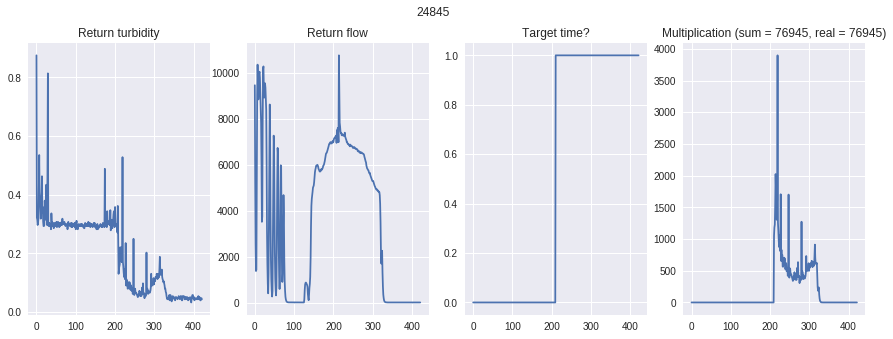

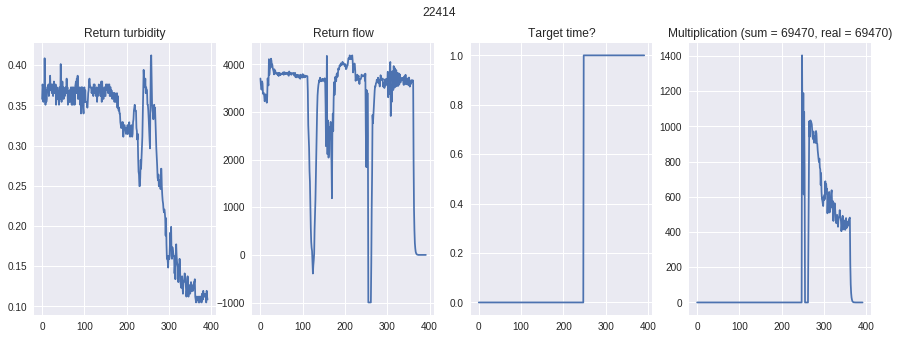

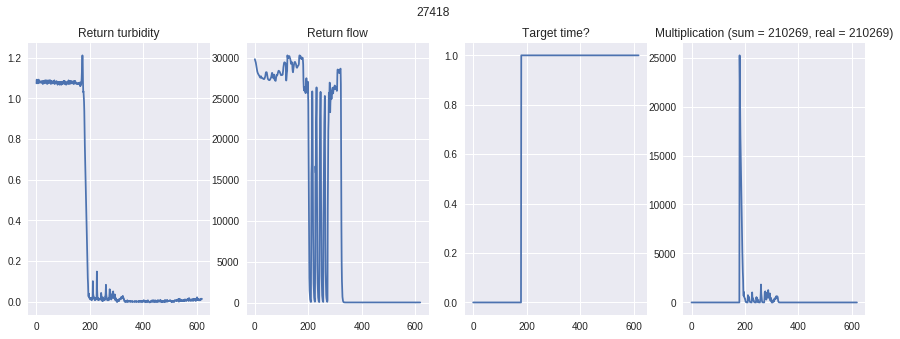

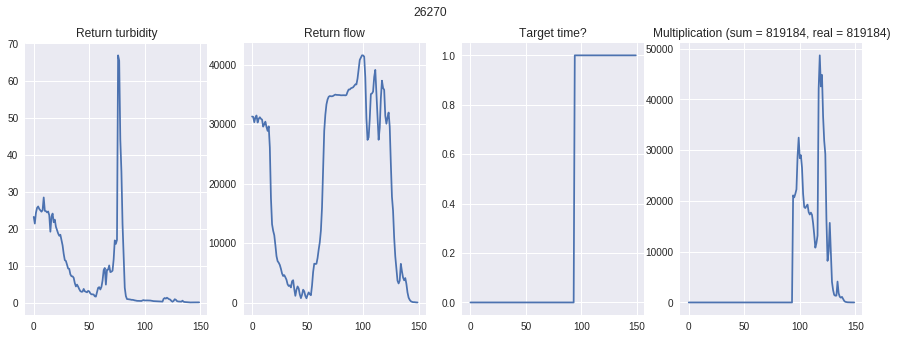

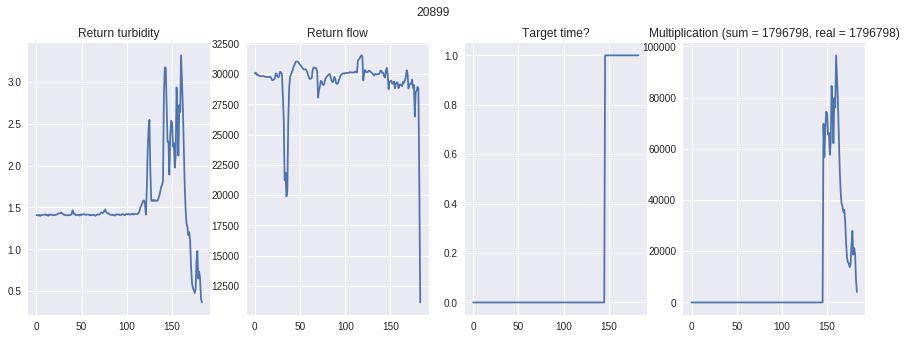

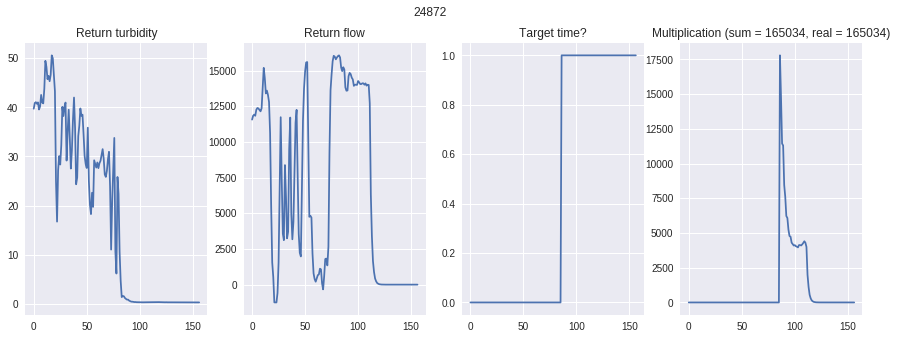

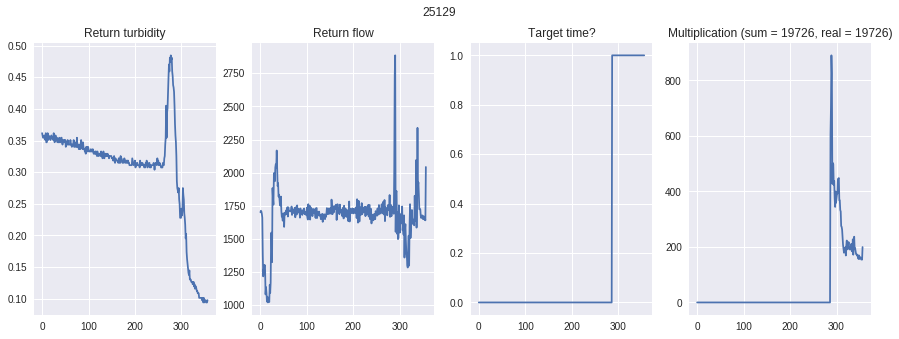

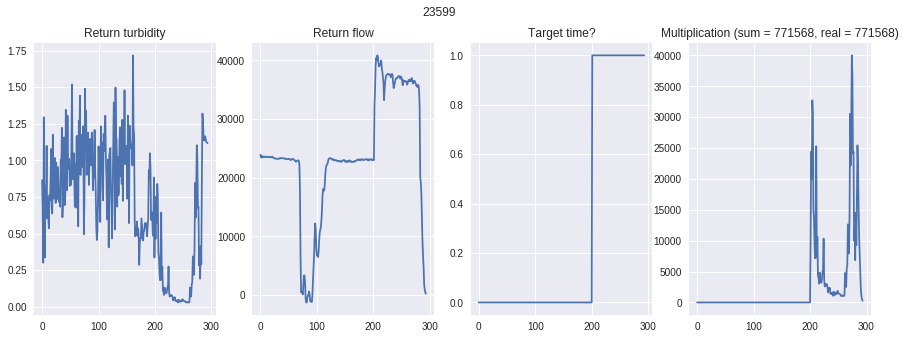

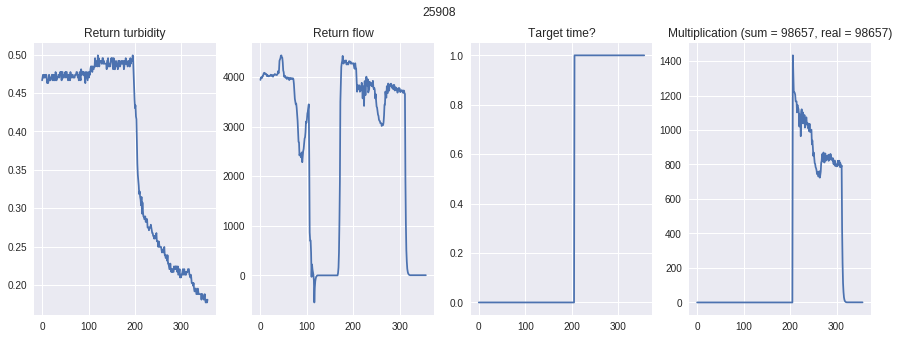

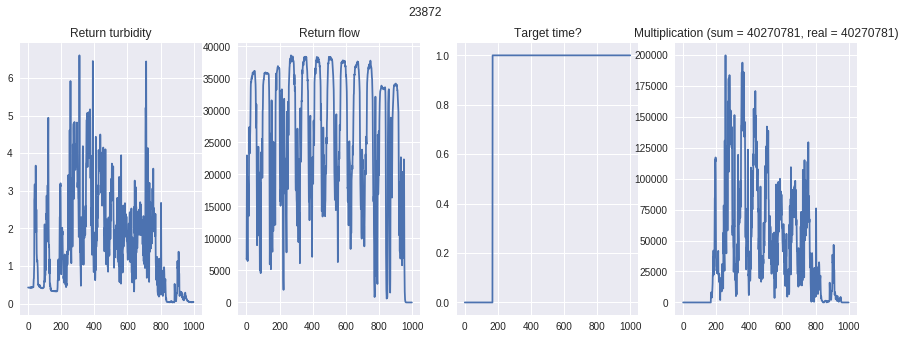

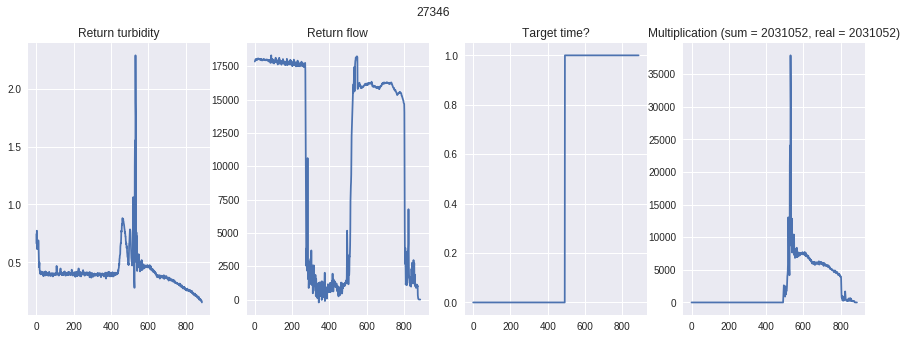

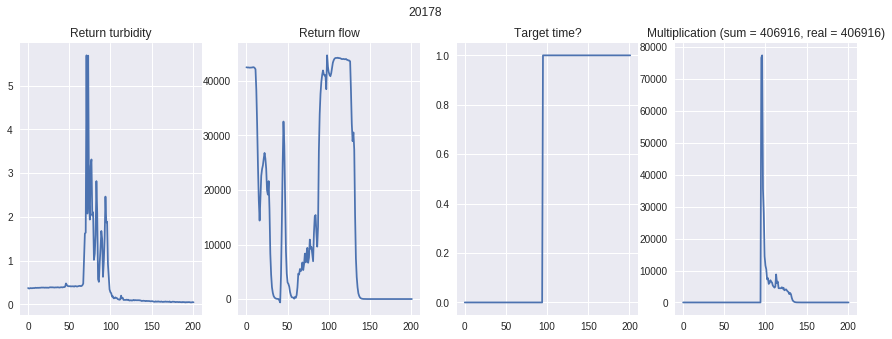

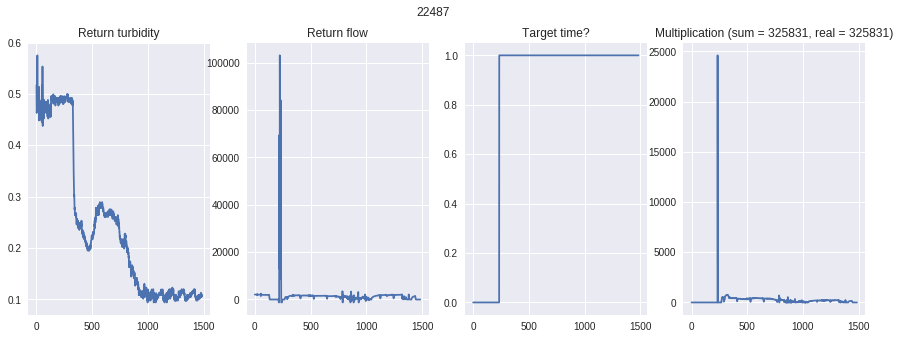

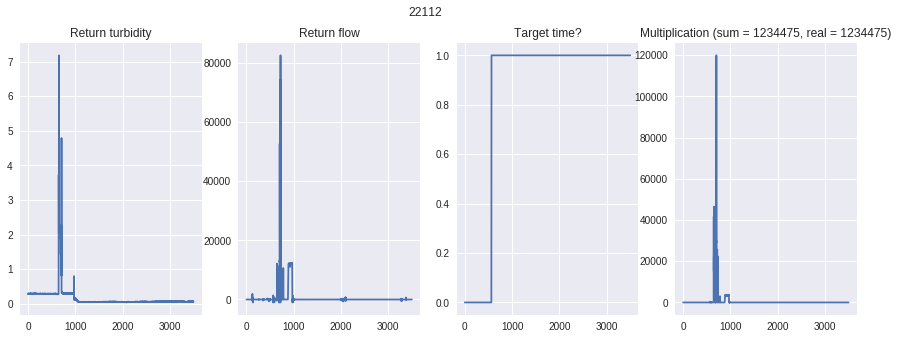

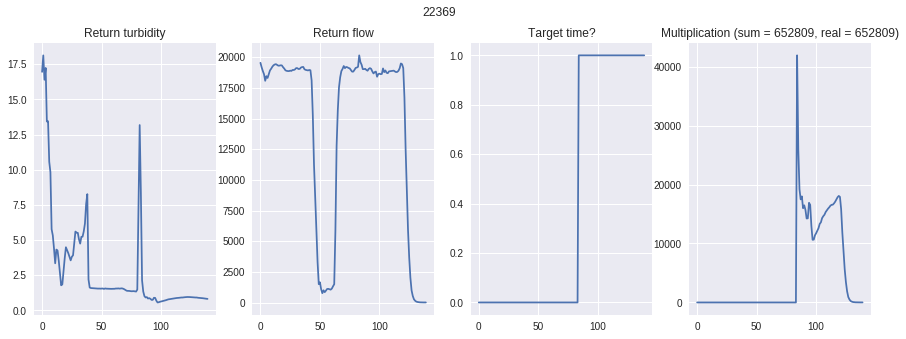

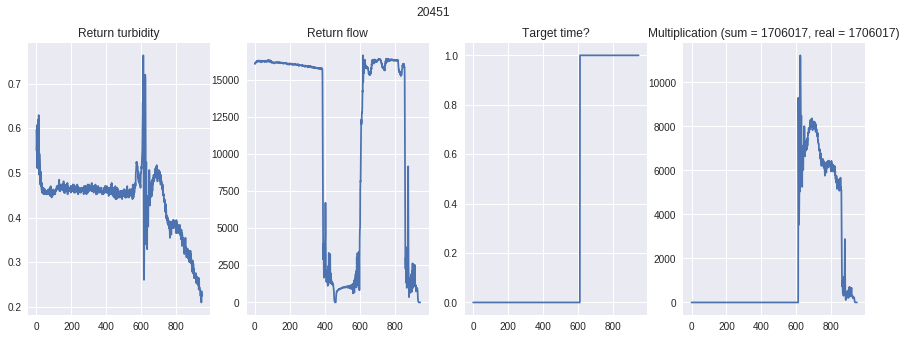

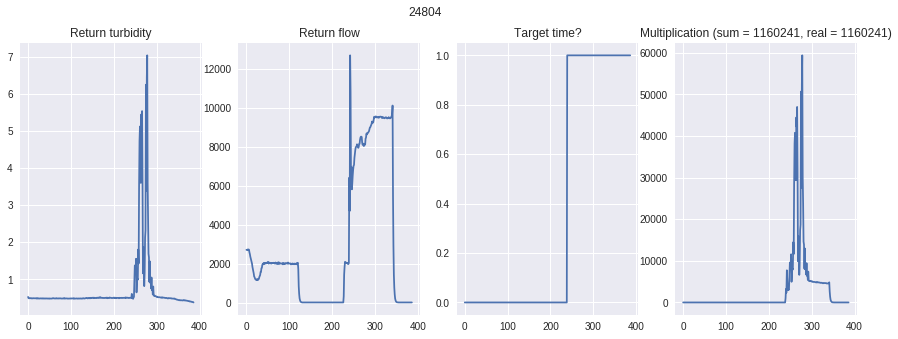

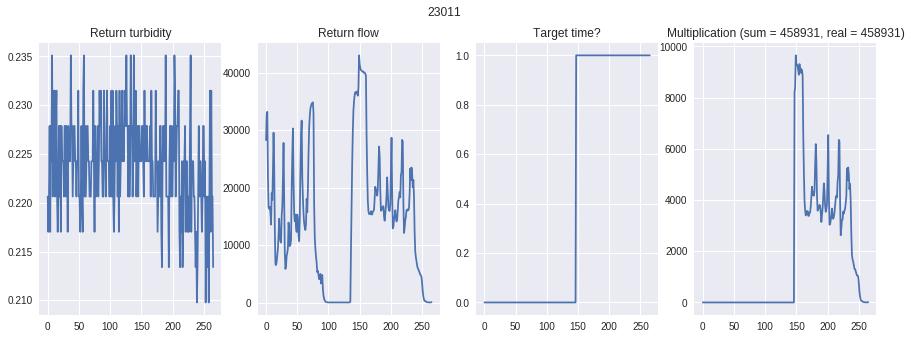

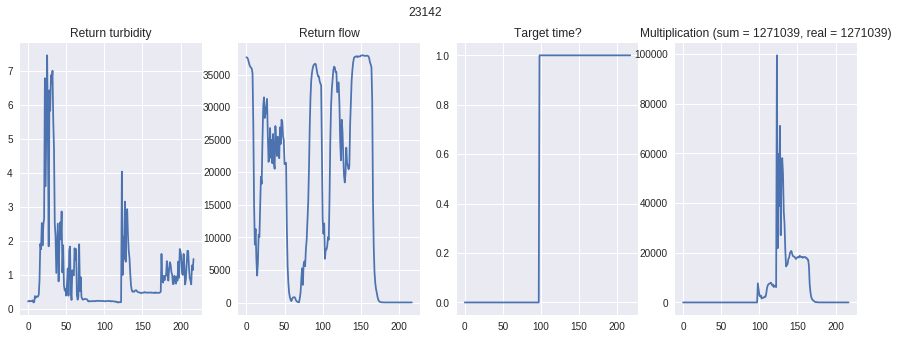

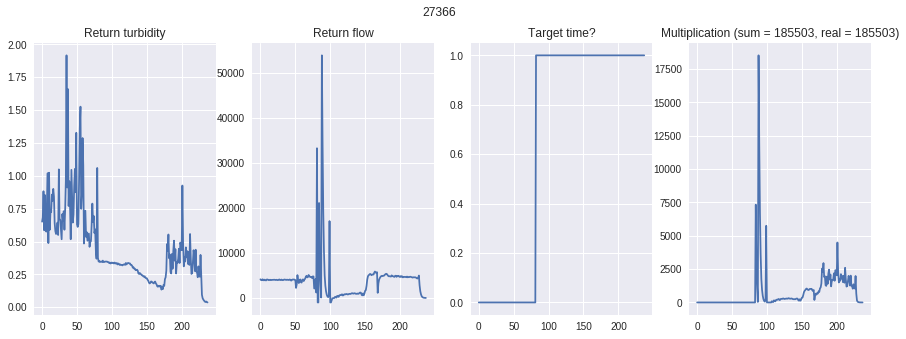

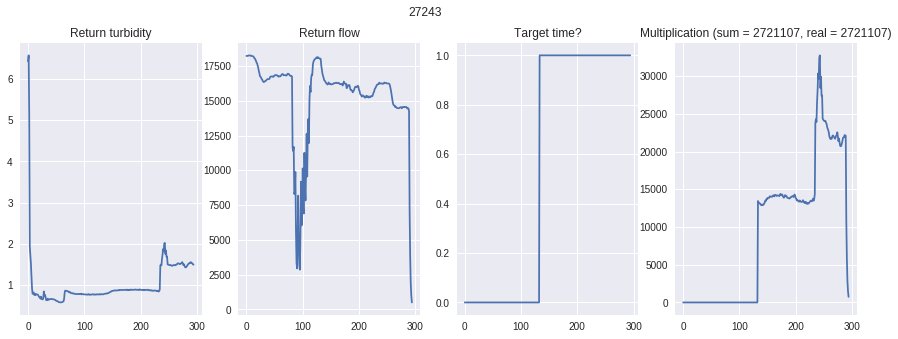

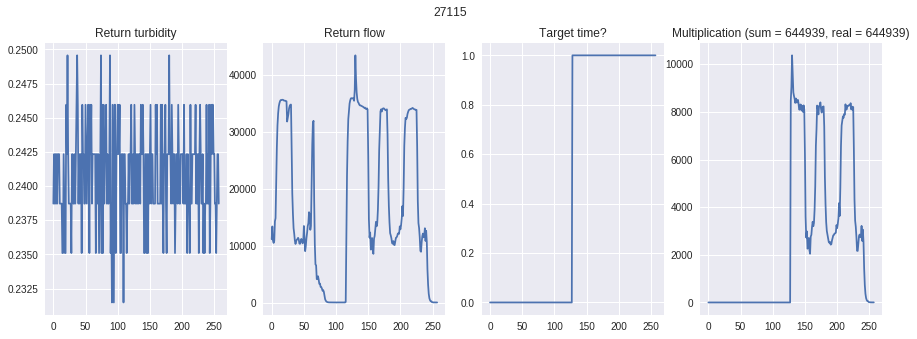

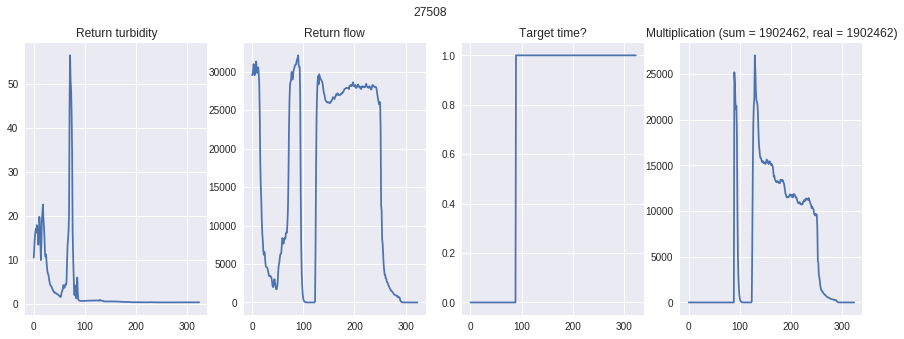

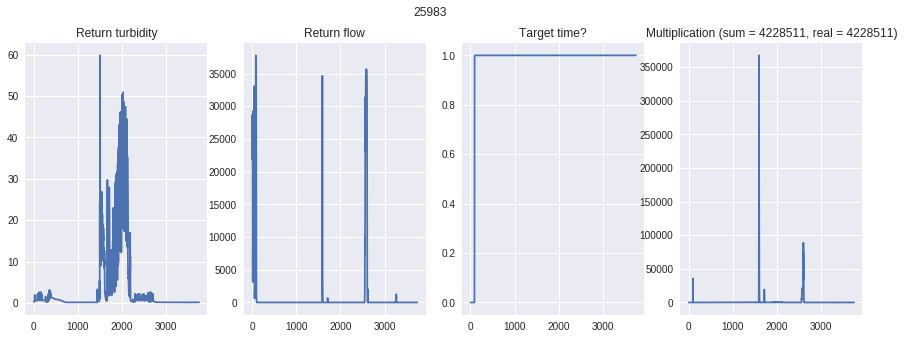

In [0]:
durations = []
for process in set(train_final_phase.sample(25)['process_id']):
    process_data = train_final_phase[train_final_phase['process_id'] == process]
    process_data = process_data.sort_values(by='timestamp')
    
    f, ax = plt.subplots(1, 4, sharex=True, figsize=(15, 5))
    
    return_turbidity = process_data['return_turbidity'].values
    return_flow = process_data['return_flow'].values
    target_time = process_data['target_time_period'].values
    label_ts = np.multiply(target_time, np.multiply(np.maximum(return_flow, 0), return_turbidity))
    
    label = sum(label_ts)
    
    durations.append(len(label_ts))
    
    real_label = all_labels.loc[process]['final_rinse_total_turbidity_liter']
    
    
    ax[0].plot(return_turbidity)
    ax[0].set_title('Return turbidity')
    ax[1].plot(return_flow)
    ax[1].set_title('Return flow')
    ax[2].plot(target_time)
    ax[2].set_title('Target time?')
    ax[3].plot(label_ts)
    ax[3].set_title('Multiplication (sum = {}, real = {})'.format(int(label), int(real_label)))
    
    f.suptitle(process)
    
    plt.savefig('/content/drive/My Drive/Rinse Over Run/{}.png'.format(process))
    

In [0]:
train_df

NameError: ignored